Sales Forcasting with Time Series Analysis

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('CoffeeSales.csv', encoding = 'unicode_escape')

In [ ]:
df.shape

(3636, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
df.head(30)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


Clean dataset

In [ ]:
# 'datetime' would be useful in case we were to perform hourly analysis (busiest time of the day)
# 'card' for customer behaviour, repeated buyers
# 'cash_type' whether sales paid by card or cash differ in trend or value.
df.drop(['datetime', 'card', 'cash_type'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   money        3636 non-null   float64
 2   coffee_name  3636 non-null   object 
dtypes: float64(1), object(2)
memory usage: 85.3+ KB


In [ ]:
df.head(30)

,date,money,coffee_name
0,2024-03-01,38.7,Latte
1,2024-03-01,38.7,Hot Chocolate
2,2024-03-01,38.7,Hot Chocolate
3,2024-03-01,28.9,Americano
4,2024-03-01,38.7,Latte
5,2024-03-01,33.8,Americano with Milk
6,2024-03-01,38.7,Hot Chocolate
7,2024-03-01,33.8,Americano with Milk
8,2024-03-01,38.7,Cocoa
9,2024-03-01,33.8,Americano with Milk


In [ ]:
df.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [ ]:
# Convert date to proper format
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [ ]:
df["date"].dtype
df["date"].isnull().sum()

np.int64(0)

Charts

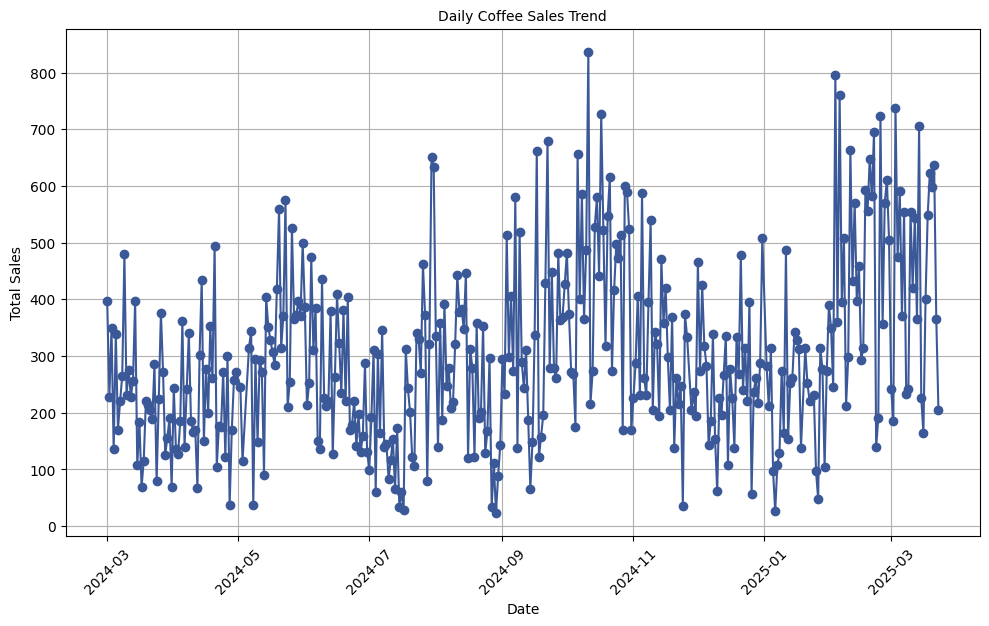

In [ ]:
# Aggregate total sales per day
daily_sales = df.groupby("date")["money"].sum().reset_index()

# Plot the daily sales trend
plt.figure(figsize=(10, 6))
plt.plot(daily_sales["date"], daily_sales["money"], marker="o", linestyle="-", color="#3b5998")
plt.title("Daily Coffee Sales Trend", fontsize=10)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2524725120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffeeType_sales.index, y=coffeeType_sales.values, palette="viridis")


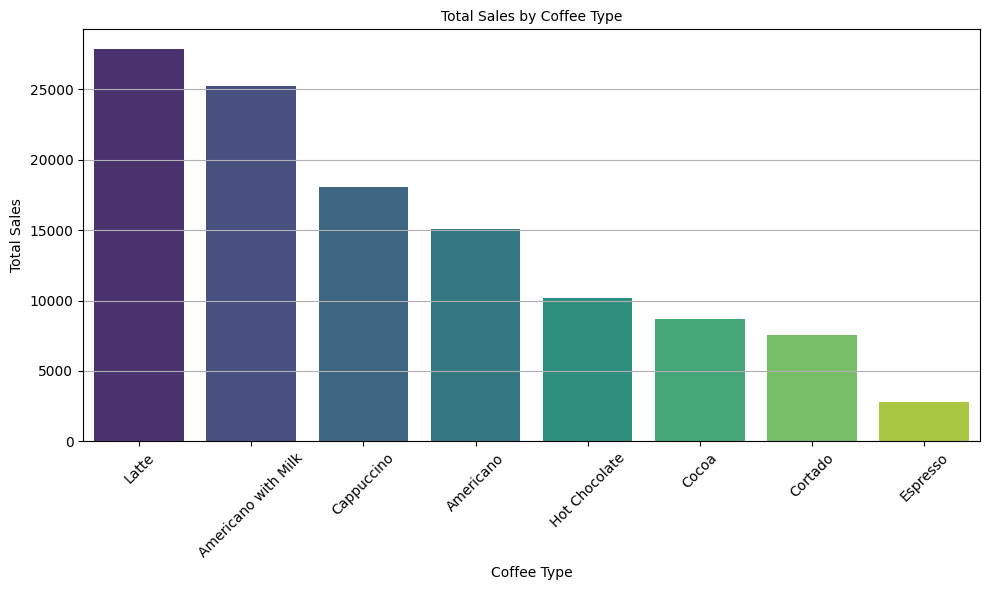

In [ ]:
# Total sales by coffee type
coffeeType_sales = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coffeeType_sales.index, y=coffeeType_sales.values, palette="viridis")
plt.title("Total Sales by Coffee Type", fontsize=10)
plt.xlabel("Coffee Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


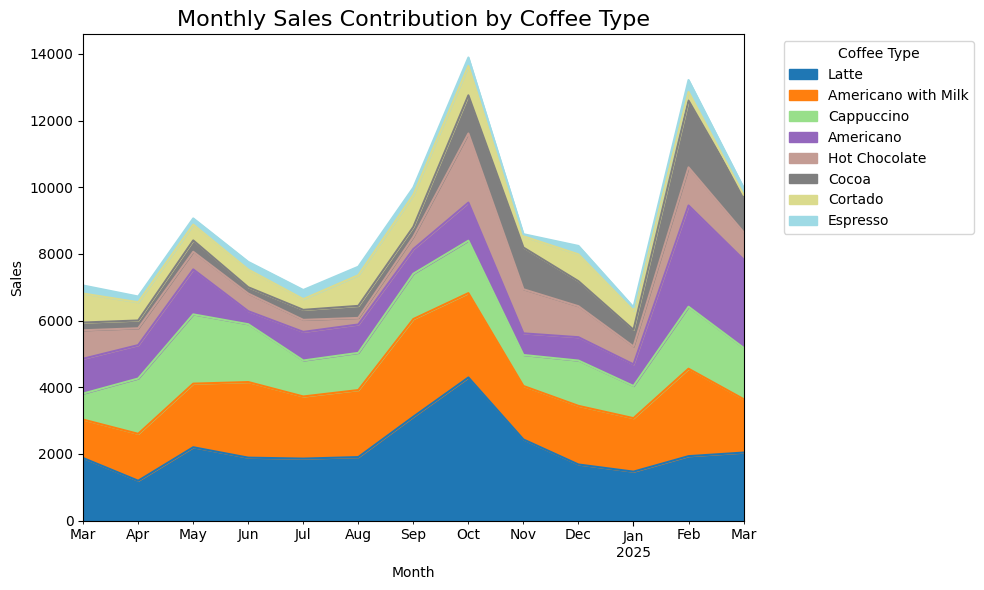

In [ ]:
# Coffee Type impact on sales over time

# Add 'month' column for monthly aggregation
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# Aggregate monthly sales per coffee type
monthly_sales = df.groupby(["month", "coffee_name"])["money"].sum().reset_index()

# Pivot to get coffee types as columns
monthly_pivot = monthly_sales.pivot(index="month", columns="coffee_name", values="money").fillna(0)

# Sort columns by total sales (top selling coffees first)
monthly_sorted = monthly_pivot[monthly_pivot.sum().sort_values(ascending=False).index]

# Plot stacked area chart
monthly_sorted.plot.area(figsize=(10, 6), colormap="tab20")
plt.title("Monthly Sales Contribution by Coffee Type", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Coffee Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Now that DA is done, forecasting is done using ARIMA.

In [ ]:
# Run ADF test to check if series is stationary
from statsmodels.tsa.stattools import adfuller

# Extract just the sales values (time series)
sales_series = daily_sales["money"]

# Run Augmented Dickey-Fuller test
result = adfuller(sales_series)

# Print results
print("ADF Statistic: ", result[0])
print("p-value: ", result[1])
print("Critical Values: ")
for key, value in result[4].items():
    print(f"{key}: {value}")

# Quick interpretation
if result[1] <= 0.05:
    print("The sales series is stationary (no differencing needed).")
else:
    print("The sales series is NOT stationary (differencing required).")


ADF Statistic:  -3.162547364234615
p-value:  0.022257540844443785
Critical Values: 
1%: -3.4479562840494475
5%: -2.869299109917524
10%: -2.57090345105665
The sales series is stationary (no differencing needed).


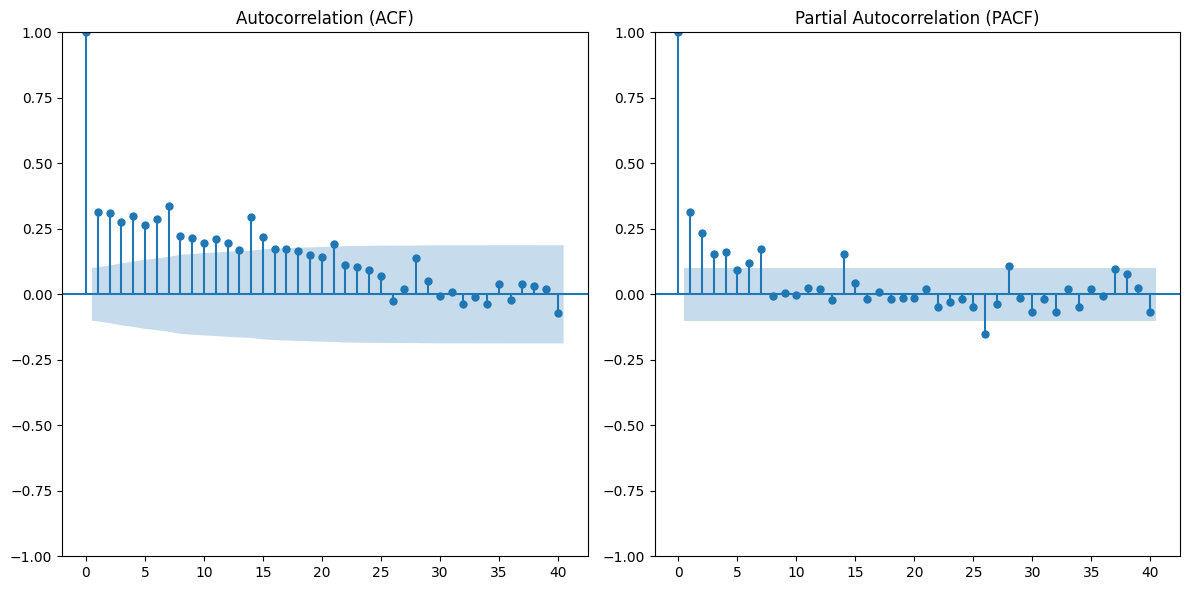

In [ ]:
# Identify parameters for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use stationary series: daily_sales["money"]
plt.figure(figsize=(12, 6))

# ACF plot (q parameter)
plt.subplot(1, 2, 1)
plot_acf(daily_sales["money"], lags=40, ax=plt.gca())
plt.title("Autocorrelation (ACF)")

# PACF plot (p parameter)
plt.subplot(1, 2, 2)
plot_pacf(daily_sales["money"], lags=40, ax=plt.gca(), method="ywm")
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
# Use auto-ARIMA to automatically select the parameters
# from pmdarima import auto_arima

# model = auto_arima(
#     daily_sales["money"],
#     start_p=0, max_p=5,
#     start_q=0, max_q=5,
#     d=0,               # stationary from ADF test
#     seasonal=False,    # non-seasonal ARIMA
#     stepwise=True,
#     trace=True
# )

# print(model.summary())

#Incompatible packages

In [ ]:
# Try candidate models and forecast
from statsmodels.tsa.arima.model import ARIMA

# Candidate orders based on ACF/PACF
orders = [(1,0,1), (1,0,2), (2,0,1), (2,0,2), (3,0,1)]

results = {}
for order in orders:
    model = ARIMA(daily_sales["money"], order=order)
    fitted = model.fit()
    results[order] = fitted.aic
    print(f"ARIMA{order} AIC = {fitted.aic}")

# Pick model with lowest AIC
best_order = min(results, key=results.get)
print("\nBest model:", best_order)

# Fit final model
final_model = ARIMA(daily_sales["money"], order=best_order)
final_results = final_model.fit()

print(final_results.summary())

# Forecast next 30 days
forecast = final_results.forecast(steps=30)
print(forecast)

ARIMA(1, 0, 1) AIC = 4860.3130001115405
ARIMA(1, 0, 2) AIC = 4862.223947261093
ARIMA(2, 0, 1) AIC = 4862.2265783031235
ARIMA(2, 0, 2) AIC = 4861.339510786418
ARIMA(3, 0, 1) AIC = 4864.175762039968

Best model: (1, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                  money   No. Observations:                  381
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2426.157
Date:                Sat, 30 Aug 2025   AIC                           4860.313
Time:                        23:44:27   BIC                           4876.084
Sample:                             0   HQIC                          4866.570
                                - 381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

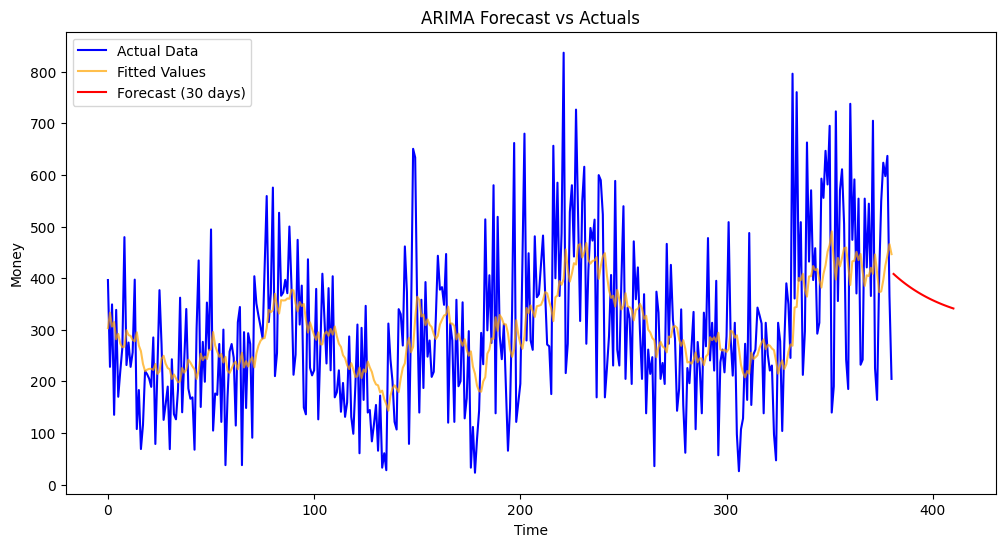

In [ ]:
# Plot the forecast result
# Plot actual data
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales["money"], label="Actual Data", color="blue")

# Plot fitted values (in-sample predictions)
plt.plot(daily_sales.index, final_results.fittedvalues,
         label="Fitted Values", color="orange", alpha=0.7)

# Plot forecast (next 30 days)
forecast_index = range(len(daily_sales), len(daily_sales)+30)
plt.plot(forecast_index, forecast, label="Forecast (30 days)", color="red")

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Money")
plt.title("ARIMA Forecast vs Actuals")
plt.legend()
plt.show()